# IMDB Movie Data Analysis

## Objective:
The project aimed to analyze IMDb data of the top 100 movies from the past decade to uncover insights on performance, demographics, and ratings. It utilized Python's data analysis libraries to provide valuable insights for filmmakers and audiences.

## Tools and Libraries:
- **Python**: Coding and data manipulation.
- **Pandas**: Data manipulation and analysis.
- **NumPy**: Numerical computations.
- **Seaborn & Matplotlib**: Data visualization and plotting.
- **Warnings Library**: Managing warnings during analysis.

## Dataset:
- Contains top 100 movies (2010-2016) with budget, earnings, IMDb ratings, MetaCritic scores, actor details, and voting demographics.

## Key Tasks and Insights:
1. **Data Cleaning**: Converted budget and earnings to millions; no major cleaning needed.
2. **Profit Analysis**: Created and analyzed profit; explored negative profits due to incomplete data.
3. **Rating Analysis**: Compared IMDb ratings and MetaCritic scores; found movies with similar ratings.
4. **Actor Trios**: Analyzed popular actor trios based on Facebook likes.
5. **Runtime Distribution**: Analyzed movie runtimes; found most are around 2 hours.
6. **R-Rated Movies**: Analyzed R-rated movies by under-18 votes.
7. **Demographic Analysis**: Aggregated votes by genre and demographic; visualized with heatmaps.

## Visualizations:
- Scatter plots, histograms, heatmaps.

## Inferences:
- **Profit & Loss**: Some high-grossing movies had negative profits.
- **Ratings**: Consistent ratings between critics and audiences.
- **Popular Genres**: Sci-Fi was popular among young audiences.
- **R-Rated Movies**: Significant votes from underage viewers.
- **Gender Preferences**: Males voted more, with Sci-Fi being a favorite.

## Challenges:
- Handling large numeric values and ensuring consistent actor trio popularity.

## Conclusion:
This analysis provided insights into movie industry trends, showcasing skills in data analysis, visualization, and deriving actionable business insights.


# Importing Required Libraries

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read The Data
df = pd.read_csv('MovieAssignmentData 1.csv')
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [3]:
# Check the number of rows and columns in the dataframe
df.shape

(100, 62)

#  Overview of the Data
### IMDb Movie Data
- The dataset includes the top 100-rated movies from the past decade, containing information about the movies, their actors and the voters.
- The project aims to derive insights into these movies and their voters using Pyth          .


# Checking Column-Wise Information

In [4]:
#check the column wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

# Summary Statistics for Numeric Columns

In [5]:
#check the summary for the numeric columns
df.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


# Data Analysis and Conversion

### Data Analysis
- No need for data cleaning.
### Reduce Large Numbers
- Convert the units of the 'budget' and 'gross' columns from dollars to million dollas.


In [6]:
# Convert 'gross' and 'budget' columns from dollars to million dollars
df['Gross'] = df['Gross'] / 1000000
df['budget'] = df['budget'] / 1000000
df[['Gross', 'budget']]

,Gross,budget
0,151.101803,30.0
1,341.268248,150.0
2,51.738905,12.0
3,100.546139,47.0
4,47.695371,9.0
...,...,...
95,13.092000,3.3
96,8.114507,3.0
97,936.662225,245.0
98,296.347721,150.0


# Profit Analysis

### Let's Talk About Profit
1. Create a new column 'profit' which is the difference between 'Gross' and 'budget'.
2. Sort the dataframe using the 'profit' column.
3. Extract the top ten profiting movies and store them in a new dataframe.
4. Plot a scatter plot between 'budget' and 'profit'.
5. Extract movies with negative profit and store them in a new dataframe.

In [7]:
# Create the new column 'profit' by subtracting 'budget' from 'Gross'
df['profit'] = df['Gross'] - df['budget']
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371


In [8]:
# Sort the dataframe with 'profit' column as reference
df = df.sort_values(by='profit', ascending=False)
df1 = df.sort_values(by='Gross', ascending=False)
df1.head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
9,Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.8,7.6,7.6,7.9,7.5,8.1,7.7,PG-13,USA,157.197282
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
19,Guardians of the Galaxy,2014,170.0,333.130696,Bradley Cooper,Vin Diesel,Djimon Hounsou,14000,14000.0,3000.0,...,8.0,7.9,7.9,8.0,7.6,8.3,7.9,PG-13,USA,163.130696


In [9]:
# Get the top 10 profitable movies
top10 = df.iloc[:10]
top10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


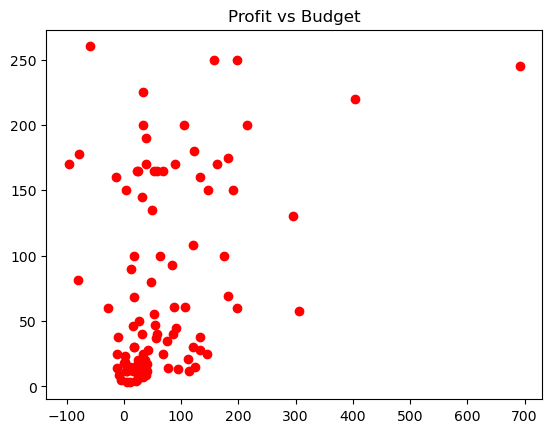

In [10]:
# Plot profit vs budget
plt.title('Profit vs Budget')
x = df['profit']
y = df['budget']
plt.scatter(x, y , color = 'Red')
plt.show()

- The scatter plot shows a mix of profitable and non-profitable movies. Some movies have negative profits, which may be due to data inconsistency or incomplete financial information.


In [11]:
# Find the movies with negative profit
negative_df = df[df['profit'] < 0]
negative_df.head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


- Tangled in the dataset. one of the highest grossing movies of all time
- It has negative profit as per this result.
-  if you cross check the gross value of this movie,  gross in the dataset accounts only for the domestic gross and not the worldwide gross. this is true for many other movies also in the list.

### Task - The General Audience and Critics
- MetaCritic scores are on a scale of 100; convert them to a scale of 10.
- Identify movies liked by both critics and audiences with an average rating of 8 or higher.

In [12]:
df.MetaCritic.isnull().sum()


5

In [13]:
df.IMDb_rating.isnull().sum()

0

In [14]:
# Convert MetaCritic scores to a scale of 10
df.MetaCritic = df.MetaCritic / 10
df.MetaCritic
df[['MetaCritic', 'IMDb_rating']]

,MetaCritic,IMDb_rating
97,8.1,8.1
11,6.9,8.1
47,6.5,8.0
32,7.6,7.6
12,9.2,8.3
...,...,...
46,6.9,7.5
7,7.1,7.8
17,7.1,7.9
39,7.0,7.8


In [15]:
# Calculate average ratings
df['average_ratings'] = df[['MetaCritic', 'IMDb_rating']].mean(axis=1)
df.average_ratings

97    8.10
11    7.50
47    7.25
32    7.60
12    8.75
      ... 
46    7.20
7     7.45
17    7.50
39    7.40
22    7.90
Name: average_ratings, Length: 100, dtype: float64

In [16]:
# Sort in descending order of average rating
df = df.sort_values(by='average_ratings', ascending=False)
df.head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,average_ratings
94,Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.359200,8.95
69,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.667870,8.85
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367,8.80
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,8.75
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75
34,Gravity,2013,100.0,274.084951,Phaldut Sharma,Basher Savage,Amy Warren,39,23.0,13.0,...,7.7,7.7,7.5,7.5,7.9,7.8,PG-13,UK,174.084951,8.70
70,Spotlight,2015,20.0,44.988180,Billy Crudup,Jamey Sheridan,Brian d'Arcy James,745,168.0,77.0,...,8.1,8.0,8.4,7.5,8.3,8.0,R,USA,24.988180,8.70
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623,8.65


In [17]:
df.MetaCritic.isnull().sum()

5

In [18]:
df.IMDb_rating.isnull().sum()

0

In [19]:
df.MetaCritic = df.MetaCritic/10
df.MetaCritic

94    1.00
69    0.96
18    0.94
0     0.93
4     0.96
      ... 
28    0.65
98    0.65
99    0.65
42    0.64
44    0.63
Name: MetaCritic, Length: 100, dtype: float64

In [20]:
df[['MetaCritic', 'IMDb_rating']]

,MetaCritic,IMDb_rating
94,1.00,7.9
69,0.96,8.1
18,0.94,8.2
0,0.93,8.2
4,0.96,7.9
...,...,...
28,0.65,7.8
98,0.65,7.7
99,0.65,7.6
42,0.64,7.6


In [21]:
(6.9+8.1)/2

7.5

In [22]:
#Find the average ratings
df['average_ratings'] = df[['MetaCritic', 'IMDb_rating']].mean(axis = 1)

df.average_ratings

94    4.450
69    4.530
18    4.570
0     4.565
4     4.430
      ...  
28    4.225
98    4.175
99    4.125
42    4.120
44    4.115
Name: average_ratings, Length: 100, dtype: float64

In [23]:
#sort in descending order of average rating
df = df.sort_values(by = 'average_ratings', ascending = False)
df.head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,average_ratings
16,The Hobbit: An Unexpected Journey,2012,180.0,303.001229,Aidan Turner,Adam Brown,James Nesbitt,5000,972.0,773.0,...,7.7,7.6,8.0,7.5,7.8,7.8,PG-13,USA,123.001229,7.900
88,About Time,2013,12.0,15.294553,Tom Hughes,Tom Hollander,Lindsay Duncan,565,555.0,171.0,...,7.6,7.5,7.8,6.9,7.8,7.7,R,UK,3.294553,7.800
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786,7.700
71,The Book Thief,2013,19.0,21.483154,Emily Watson,Sophie NÃ©lisse,Roger Allam,876,526.0,326.0,...,7.6,7.5,8.0,6.6,7.6,7.5,PG-13,USA,2.483154,7.600
52,Lone Survivor,2013,40.0,125.069696,Jerry Ferrara,Scott Elrod,Dan Bilzerian,480,449.0,127.0,...,7.5,7.4,7.8,6.8,7.8,7.3,R,USA,85.069696,7.500
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,4.770
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,4.690
26,Interstellar,2014,165.0,187.991439,Matthew McConaughey,Anne Hathaway,Mackenzie Foy,11000,11000.0,6000.0,...,7.9,7.9,7.7,7.9,8.4,8.5,PG-13,USA,22.991439,4.670
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,4.610
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,4.605


In [24]:
#Find the movies with metacritic-IMDB rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)
df[(abs(df['IMDb_rating']- df['MetaCritic']) < 0.5) & (df['average_ratings'] > 8)]

UniversalAcclaim =  df[(abs(df['IMDb_rating'] - df['MetaCritic']) < 0.5) & (df['average_ratings'] > 8)]
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,average_ratings


In [25]:
# Find movies with MetaCritic-IMDB rating < 0.5 and average rating >= 8
UniversalAcclaim = df[(abs(df['IMDb_rating'] - df['MetaCritic']) < 0.5) & (df['average_ratings'] > 8)]
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,average_ratings


# Finding Popular Actor Trios

### Task - Find the Most Popular Trios-I
- Sum the Facebook likes of three actors and find the top 5 trios.

In [26]:
# Create a 'likes' column by summing Facebook likes of actors
df['likes'] = df.actor_1_facebook_likes + df.actor_2_facebook_likes + df.actor_3_facebook_likes
df[['likes']].head(15)

,likes
16,6745.0
88,1291.0
82,2639.0
71,1728.0
52,1056.0
27,79000.0
95,25505.0
26,28000.0
12,16721.0
35,40265.0


In [27]:
# Sort 'likes' in descending order
df.sort_values(by='likes', ascending=False, inplace=True)
df[['actor_1_name', 'actor_2_name', 'actor_3_name', 'likes']].head(5)

,actor_1_name,actor_2_name,actor_3_name,likes
2,Dev Patel,Nicole Kidman,Rooney Mara,138800.0
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,79000.0
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,76000.0
4,Casey Affleck,Michelle Williams,Kyle Chandler,74818.0
8,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,73000.0


# Finding Popular Trios with Conditions

### Task - Find the Most Popular Trios-II
- Ensure none of the trio's Facebook likes are less than half of the other two.

In [28]:
act1 = df['actor_1_facebook_likes'] / 2
act2 = df['actor_2_facebook_likes'] / 2
act3 = df['actor_3_facebook_likes'] / 2

# Apply conditions
a = ((df['actor_1_facebook_likes'] > act1) & (df['actor_1_facebook_likes'] > act3))
b = ((df['actor_2_facebook_likes'] > act2) & (df['actor_2_facebook_likes'] > act3))
c = ((df['actor_3_facebook_likes'] > act3) & (df['actor_3_facebook_likes'] > act2))
eligible = a & b & c

df['eligible'] = eligible
df.loc[eligible, ['eligible', 'actor_1_name', 'actor_2_name', 'actor_3_name']].head(5)

,eligible,actor_1_name,actor_2_name,actor_3_name
27,True,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt
14,True,Jennifer Lawrence,Peter Dinklage,Hugh Jackman
8,True,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
68,True,Jennifer Lawrence,Robert De Niro,Bradley Cooper
11,True,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson


# Runtime Distribution

### Task - Runtime Distribution
- Plot the histogram or distplot of movie runtimes


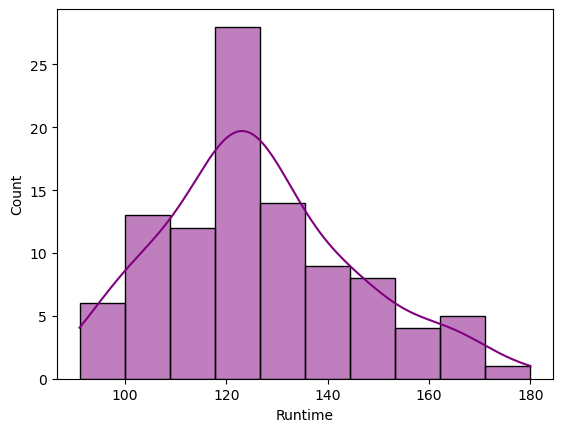

In [29]:
sns.histplot(x=df.Runtime, data=df, color='purple', fill=True, kde=True, stat='count')
plt.show()

- Most of the movies appear to be sharply 2 hour-long

### Subtask - R-Rated Movies
- Find the top 10 R-rated movies with the highest number of votes from under-18 voters.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2 to 6
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    float64
 3   Gross                   100 non-null    float64
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     float64
 

In [31]:
# Filter R-rated movies with votes from under-18
PopulaR = df[(df.content_rating == 'R') & (df.CVotesU18 > 0)]
PopulaR.sort_values(by='CVotesU18', ascending=False, inplace=True)
PopulaR[['Title']].head(15)

,Title
47,Deadpool
36,The Wolf of Wall Street
35,Django Unchained
29,Mad Max: Fury Road
95,Whiplash
31,The Revenant
40,Shutter Island
43,Gone Girl
65,The Grand Budapest Hotel
72,Birdman or (The Unexpected Virtue of Ignorance)


# Demographic Analysis

#### Task - Demographic Analysis
- Combine the DataFrame by genres and aggregate CVotes and Votes data
- There are 3 column in the dataframe- genre1, genre2, genre3 as a part of this subtask, you need to aggregate a few values over these 3 columns.
1. First create a new dataframe df_by_genre, that contains genre_1, genre_2, genre_3 and all the columns related to Cvotes/Votes from the movies, dataframe. there are 47 columns to be extracted in total.

2. Now add a column called cnt to the dataframe df_by_genre and initialize it to one. you will realise the use of this column byu the end of this subtask.

3. First group the dataframe df_by_genre by genre_1 and find the sum of all the numeric columnns such as cnt, columns related to CVotes and Voted colunms and sotre it in a dataframe df_by_g1

4. Perform the same operation for genre_2 and genre_3 colunms and store it in dataframe df_by_g2, df_by_g3 respectively.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2 to 6
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    float64
 3   Gross                   100 non-null    float64
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     float64
 

In [33]:
#Create the dataframe df_by_genre
df_by_genre = df[['genre_1','genre_2','genre_3' , 'CVotes10', 'CVotes09','CVotes08',
                  'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01','CVotesMale', 'CVotesFemale',
                  'CVotesU18','CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044F',
                  'CVotes3044M', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000','CVotesUS', 'CVotesnUS', 
                  'VotesU18M', 'VotesU18F', 'Votes1829', 'Votes1829F','Votes1829M', 'Votes3044', 'Votes3044M',
                  'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
                  'VotesnUS', 'VotesM', 'VotesF', 'VotesU18', ]]
df_by_genre

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,VotesM,VotesF,VotesU18
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,8.0,8.4,8.3
27,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.5,8.1,8.1,8.0,8.2,8.7,8.8,8.8,8.7,9.1
14,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,...,8.0,7.7,7.7,7.9,7.4,8.1,7.9,8.0,8.1,8.4
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,7.9,7.7,8.5
8,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,8.5,8.4,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,8.0,8.3,8.5
34,Drama,Sci-Fi,Thriller,89986,127616,169693,122275,57564,25393,12286,...,7.5,7.7,7.7,7.5,7.5,7.9,7.8,7.8,7.5,7.5
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,8.2,8.1,8.9
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,7.9,8.0,8.6


In [34]:
#create a column cnt and intialize it to 1
df_by_genre['cnt'] = 1
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,VotesM,VotesF,VotesU18,cnt
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.0,7.9,8.4,7.1,8.1,8.0,8.0,8.4,8.3,1
27,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.1,8.1,8.0,8.2,8.7,8.8,8.8,8.7,9.1,1
14,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,...,7.7,7.7,7.9,7.4,8.1,7.9,8.0,8.1,8.4,1
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.6,7.6,7.6,7.1,7.9,7.8,7.9,7.7,8.5,1
8,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,...,7.9,7.9,7.9,7.8,8.4,8.4,8.5,8.4,8.6,1


In [35]:
#Group the movies by individual genres
df_by_g1 = df_by_genre.groupby('genre_1').sum()
df_by_g2 = df_by_genre.groupby('genre_2').sum()
df_by_g3 = df_by_genre.groupby('genre_3').sum()

In [36]:
#df_add = df_by_g1.add(df_by_g2, fill_value=0).add(df_by_g3, fill_value=0)

### Check Data Types: Verify the data types of the columns in your DataFrames to identify any string values.

In [37]:
print(df_by_g1.dtypes)
print(df_by_g2.dtypes)
print(df_by_g3.dtypes)

genre_2          object
genre_3          object
CVotes10          int64
CVotes09          int64
CVotes08          int64
CVotes07          int64
CVotes06          int64
CVotes05          int64
CVotes04          int64
CVotes03          int64
CVotes02          int64
CVotes01          int64
CVotesMale        int64
CVotesFemale      int64
CVotesU18         int64
CVotesU18M        int64
CVotesU18F        int64
CVotes1829        int64
CVotes1829M       int64
CVotes1829F       int64
CVotes3044        int64
CVotes3044F       int64
CVotes3044M       int64
CVotes45A         int64
CVotes45AM        int64
CVotes45AF        int64
CVotes1000        int64
CVotesUS          int64
CVotesnUS         int64
VotesU18M       float64
VotesU18F       float64
Votes1829       float64
Votes1829F      float64
Votes1829M      float64
Votes3044       float64
Votes3044M      float64
Votes3044F      float64
Votes45A        float64
Votes45AM       float64
Votes45AF       float64
Votes1000       float64
VotesUS         

Convert Data Types: If any columns are of type object (which can include strings), you may need to convert them to numeric types. You can use pd.to_numeric() to handle this, with errors='coerce' to convert non-numeric values to NaN.


In [38]:
df_by_g1 = df_by_g1.apply(pd.to_numeric, errors='coerce')
df_by_g2 = df_by_g2.apply(pd.to_numeric, errors='coerce')
df_by_g3 = df_by_g3.apply(pd.to_numeric, errors='coerce')

Check for NaN Values: After conversion, check for NaN values that might result from the conversion and decide how to handle them (e.g., fill with zeros).

In [39]:
df_by_g1 = df_by_g1.fillna(0)
df_by_g2 = df_by_g2.fillna(0)
df_by_g3 = df_by_g3.fillna(0)

In [40]:
#Reattempt Addition: Try adding the DataFrames again after ensuring they contain only numeric data.
df_add = df_by_g1.add(df_by_g2, fill_value=0).add(df_by_g3, fill_value=0)

In [41]:
df_add

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt,genre_1,genre_2,genre_3
Action,171247.0,65573.0,95004.0,166970.0,393484.0,1075354.0,2922126.0,4677755.0,3547429.0,3166467.0,...,243.2,253.8,256.8,252.8,247.6,240.6,31.0,0.0,0.0,0.0
Adventure,173858.0,69737.0,103318.0,183070.0,438970.0,1212075.0,3281981.0,5262328.0,4014192.0,3594659.0,...,298.4,311.4,314.9,309.3,303.5,296.2,38.0,0.0,0.0,0.0
Animation,25193.0,10026.0,15733.0,30718.0,83069.0,251076.0,722782.0,1153214.0,798227.0,681562.0,...,86.4,88.9,90.7,87.7,87.6,86.1,11.0,NaN,0.0,0.0
Biography,51297.0,20613.0,29510.0,53718.0,138648.0,425595.0,1332980.0,2231078.0,1401608.0,852003.0,...,141.1,146.9,146.9,146.6,142.7,139.9,18.0,0.0,0.0,0.0
Comedy,88367.0,39391.0,56218.0,97469.0,226852.0,600287.0,1591069.0,2506851.0,1774987.0,1383616.0,...,180.2,187.4,186.9,186.9,182.6,178.9,23.0,0.0,0.0,0.0
Crime,37217.0,16985.0,24713.0,42271.0,98690.0,278391.0,821390.0,1419495.0,967118.0,574526.0,...,86.6,90.6,87.7,90.9,87.8,85.8,11.0,0.0,0.0,0.0
Drama,211308.0,94185.0,135126.0,235475.0,552312.0,1529356.0,4319700.0,7107053.0,4935375.0,3404438.0,...,509.8,533.6,529.7,532.2,515.9,506.0,65.0,0.0,0.0,0.0
Family,7545.0,3317.0,5128.0,9472.0,22971.0,59137.0,143401.0,180381.0,95675.0,98165.0,...,15.0,15.9,16.2,15.7,15.6,15.0,2.0,0.0,0.0,0.0
Fantasy,38841.0,14693.0,22233.0,39403.0,93484.0,241831.0,599747.0,889767.0,602223.0,572452.0,...,54.1,56.9,58.3,56.5,54.9,53.7,7.0,0.0,0.0,0.0
History,9291.0,3148.0,4384.0,7964.0,21233.0,67861.0,223062.0,394531.0,260387.0,151261.0,...,31.7,32.9,33.3,32.9,32.2,31.2,4.0,0.0,0.0,0.0


In [42]:
#Extract genres with atleast 10 occurrences
genre_top10 = df_add[(df_add['cnt'] >= 10)]

In [43]:
genre_top10

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt,genre_1,genre_2,genre_3
Action,171247.0,65573.0,95004.0,166970.0,393484.0,1075354.0,2922126.0,4677755.0,3547429.0,3166467.0,...,243.2,253.8,256.8,252.8,247.6,240.6,31.0,0.0,0.0,0.0
Adventure,173858.0,69737.0,103318.0,183070.0,438970.0,1212075.0,3281981.0,5262328.0,4014192.0,3594659.0,...,298.4,311.4,314.9,309.3,303.5,296.2,38.0,0.0,0.0,0.0
Animation,25193.0,10026.0,15733.0,30718.0,83069.0,251076.0,722782.0,1153214.0,798227.0,681562.0,...,86.4,88.9,90.7,87.7,87.6,86.1,11.0,NaN,0.0,0.0
Biography,51297.0,20613.0,29510.0,53718.0,138648.0,425595.0,1332980.0,2231078.0,1401608.0,852003.0,...,141.1,146.9,146.9,146.6,142.7,139.9,18.0,0.0,0.0,0.0
Comedy,88367.0,39391.0,56218.0,97469.0,226852.0,600287.0,1591069.0,2506851.0,1774987.0,1383616.0,...,180.2,187.4,186.9,186.9,182.6,178.9,23.0,0.0,0.0,0.0
Crime,37217.0,16985.0,24713.0,42271.0,98690.0,278391.0,821390.0,1419495.0,967118.0,574526.0,...,86.6,90.6,87.7,90.9,87.8,85.8,11.0,0.0,0.0,0.0
Drama,211308.0,94185.0,135126.0,235475.0,552312.0,1529356.0,4319700.0,7107053.0,4935375.0,3404438.0,...,509.8,533.6,529.7,532.2,515.9,506.0,65.0,0.0,0.0,0.0
Romance,40075.0,19200.0,27698.0,48913.0,110901.0,281289.0,712841.0,1069280.0,689492.0,549959.0,...,100.7,105.8,106.1,104.8,101.8,100.1,13.0,0.0,0.0,0.0
Sci-Fi,114435.0,46171.0,65904.0,111925.0,254175.0,671811.0,1802098.0,3002994.0,2530855.0,2325284.0,...,135.4,140.9,141.6,141.0,137.5,134.0,17.0,0.0,0.0,0.0
Thriller,57630.0,25767.0,37940.0,65281.0,149953.0,416046.0,1175799.0,1993378.0,1465491.0,1081701.0,...,102.3,106.7,104.9,106.7,103.1,101.5,13.0,0.0,0.0,0.0


In [44]:
genre_top10.shape

(10, 48)

In [45]:
#Take mean for every column by dividing with cnt
genre_top10 = pd.concat([genre_top10.iloc[:, 0:44].div(genre_top10.cnt, axis = 0), genre_top10.cnt], axis = 1)
genre_top10

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
Action,5524.096774,2115.258065,3064.645161,5386.129032,12693.032258,34688.838710,94262.129032,150895.322581,114433.193548,102144.096774,...,7.754839,7.625806,7.922581,7.845161,8.187097,8.283871,8.154839,7.987097,7.761290,31.0
Adventure,4575.210526,1835.184211,2718.894737,4817.631579,11551.842105,31896.710526,86367.921053,138482.315789,105636.631579,94596.289474,...,7.842105,7.642105,8.013158,7.852632,8.194737,8.286842,8.139474,7.986842,7.794737,38.0
Animation,2290.272727,911.454545,1430.272727,2792.545455,7551.727273,22825.090909,65707.454545,104837.636364,72566.090909,61960.181818,...,7.881818,7.645455,8.118182,7.854545,8.081818,8.245455,7.972727,7.963636,7.827273,11.0
Biography,2849.833333,1145.166667,1639.444444,2984.333333,7702.666667,23644.166667,74054.444444,123948.777778,77867.111111,47333.500000,...,7.872222,7.661111,7.877778,7.838889,8.161111,8.161111,8.144444,7.927778,7.772222,18.0
Comedy,3842.043478,1712.652174,2444.260870,4237.782609,9863.130435,26099.434783,69176.913043,108993.521739,77173.347826,60157.217391,...,7.700000,7.595652,7.878261,7.834783,8.147826,8.126087,8.126087,7.939130,7.778261,23.0
Crime,3383.363636,1544.090909,2246.636364,3842.818182,8971.818182,25308.272727,74671.818182,129045.000000,87919.818182,52229.636364,...,7.681818,7.618182,7.718182,7.872727,8.236364,7.972727,8.263636,7.981818,7.800000,11.0
Drama,3250.892308,1449.000000,2078.861538,3622.692308,8497.107692,23528.553846,66456.923077,109339.276923,75928.846154,52375.969231,...,7.741538,7.620000,7.850769,7.843077,8.209231,8.149231,8.187692,7.936923,7.784615,65.0
Romance,3082.692308,1476.923077,2130.615385,3762.538462,8530.846154,21637.615385,54833.923077,82252.307692,53037.846154,42304.538462,...,7.607692,7.500000,7.830769,7.746154,8.138462,8.161538,8.061538,7.830769,7.700000,13.0
Sci-Fi,6731.470588,2715.941176,3876.705882,6583.823529,14951.470588,39518.294118,106005.764706,176646.705882,148873.823529,136781.411765,...,7.735294,7.694118,7.958824,7.964706,8.288235,8.329412,8.294118,8.088235,7.882353,17.0
Thriller,4433.076923,1982.076923,2918.461538,5021.615385,11534.846154,32003.538462,90446.076923,153336.769231,112730.076923,83207.769231,...,7.746154,7.638462,7.815385,7.869231,8.207692,8.069231,8.207692,7.930769,7.807692,13.0


In [46]:
genre_top10.info

<bound method DataFrame.info of               CVotes01     CVotes02     CVotes03     CVotes04      CVotes05  \
Action     5524.096774  2115.258065  3064.645161  5386.129032  12693.032258   
Adventure  4575.210526  1835.184211  2718.894737  4817.631579  11551.842105   
Animation  2290.272727   911.454545  1430.272727  2792.545455   7551.727273   
Biography  2849.833333  1145.166667  1639.444444  2984.333333   7702.666667   
Comedy     3842.043478  1712.652174  2444.260870  4237.782609   9863.130435   
Crime      3383.363636  1544.090909  2246.636364  3842.818182   8971.818182   
Drama      3250.892308  1449.000000  2078.861538  3622.692308   8497.107692   
Romance    3082.692308  1476.923077  2130.615385  3762.538462   8530.846154   
Sci-Fi     6731.470588  2715.941176  3876.705882  6583.823529  14951.470588   
Thriller   4433.076923  1982.076923  2918.461538  5021.615385  11534.846154   

               CVotes06       CVotes07       CVotes08       CVotes09  \
Action     34688.838710   

In [47]:
#Rounding off the columns of votes to two decimals
genre_top10.iloc[:, 27:].round(2)

,Votes1000,Votes1829,Votes1829F,Votes1829M,Votes3044,Votes3044F,Votes3044M,Votes45A,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
Action,7.30,7.99,8.00,7.98,7.74,7.80,7.73,7.65,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
Adventure,7.38,8.02,8.09,8.01,7.75,7.87,7.73,7.68,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
Animation,7.27,8.05,8.20,7.99,7.76,7.98,7.72,7.68,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0
Biography,7.23,7.97,7.93,7.98,7.73,7.77,7.72,7.69,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
Comedy,7.19,7.98,7.95,7.99,7.71,7.75,7.71,7.61,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0
Crime,7.39,7.99,7.76,8.02,7.72,7.61,7.76,7.63,7.68,7.62,7.72,7.87,8.24,7.97,8.26,7.98,7.80,11.0
Drama,7.22,7.98,7.92,8.00,7.71,7.72,7.71,7.64,7.74,7.62,7.85,7.84,8.21,8.15,8.19,7.94,7.78,65.0
Romance,6.92,7.92,7.91,7.92,7.61,7.66,7.61,7.52,7.61,7.50,7.83,7.75,8.14,8.16,8.06,7.83,7.70,13.0
Sci-Fi,7.52,8.11,8.04,8.11,7.86,7.84,7.85,7.71,7.74,7.69,7.96,7.96,8.29,8.33,8.29,8.09,7.88,17.0
Thriller,7.40,8.01,7.88,8.02,7.74,7.70,7.75,7.66,7.75,7.64,7.82,7.87,8.21,8.07,8.21,7.93,7.81,13.0


In [48]:
#converting CVotes into int type
genre_top10.iloc[:, 0:27].astype("int")

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,CVotes45A,CVotes45AF,CVotes45AM,CVotesFemale,CVotesMale,CVotesU18,CVotesU18F,CVotesU18M,CVotesUS,CVotesnUS
Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,102144,...,28862,4269,24092,67916,349581,2460,525,1916,69190,225998
Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,94596,...,26641,4267,21910,71208,309468,2520,601,1900,61734,208034
Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,61960,...,16305,3063,12966,65894,207544,2166,664,1486,47673,150424
Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,47333,...,22550,4126,18039,54827,240526,1163,265,886,45389,171004
Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,60157,...,19954,3621,15979,65142,227088,1650,459,1178,49220,165869
Crime,3383,1544,2246,3842,8971,25308,74671,129045,87919,52229,...,22867,3658,18799,53330,261935,1169,227,932,49928,181338
Drama,3250,1449,2078,3622,8497,23528,66456,109339,75928,52375,...,21612,3806,17422,54956,225671,1243,317,915,44164,161234
Romance,3082,1476,2130,3762,8530,21637,54833,82252,53037,42304,...,15719,3381,12054,63572,162668,1021,474,535,37141,131254
Sci-Fi,6731,2715,3876,6583,14951,39518,106005,176646,148873,136781,...,36127,5340,30141,83618,422437,3017,613,2382,80695,272068
Thriller,4433,1982,2918,5021,11534,32003,90446,153336,112730,83207,...,29590,4654,24421,68749,333785,1664,322,1327,63361,228944


In [49]:
genre_top10 = pd.concat([genre_top10.iloc[:, 0:27].astype('int'), genre_top10.iloc[:, 27:].round(2)], axis = 1)

In [50]:
genre_top10

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,102144,...,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,94596,...,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,61960,...,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0
Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,47333,...,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,60157,...,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0
Crime,3383,1544,2246,3842,8971,25308,74671,129045,87919,52229,...,7.68,7.62,7.72,7.87,8.24,7.97,8.26,7.98,7.80,11.0
Drama,3250,1449,2078,3622,8497,23528,66456,109339,75928,52375,...,7.74,7.62,7.85,7.84,8.21,8.15,8.19,7.94,7.78,65.0
Romance,3082,1476,2130,3762,8530,21637,54833,82252,53037,42304,...,7.61,7.50,7.83,7.75,8.14,8.16,8.06,7.83,7.70,13.0
Sci-Fi,6731,2715,3876,6583,14951,39518,106005,176646,148873,136781,...,7.74,7.69,7.96,7.96,8.29,8.33,8.29,8.09,7.88,17.0
Thriller,4433,1982,2918,5021,11534,32003,90446,153336,112730,83207,...,7.75,7.64,7.82,7.87,8.21,8.07,8.21,7.93,7.81,13.0


- If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic(Votes- Cvotes-related) columns across the top10 genres.
- we can use this dataset to extract exciting insights about the voters.

### Genres Count
- now lets derive some insights from this dataframe. make a bar chart plotting different genres vs cnt using seaborn

In [51]:
genre_top10.head()

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,102144,...,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,94596,...,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,61960,...,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0
Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,47333,...,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,60157,...,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0


In [52]:
genre_top10 = genre_top10.reset_index()
genre_top10 = genre_top10.rename(columns = {'index' : 'genre'})
genre_top10

,genre,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
0,Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,...,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
1,Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,...,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
2,Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,...,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0
3,Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,...,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
4,Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,...,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0
5,Crime,3383,1544,2246,3842,8971,25308,74671,129045,87919,...,7.68,7.62,7.72,7.87,8.24,7.97,8.26,7.98,7.80,11.0
6,Drama,3250,1449,2078,3622,8497,23528,66456,109339,75928,...,7.74,7.62,7.85,7.84,8.21,8.15,8.19,7.94,7.78,65.0
7,Romance,3082,1476,2130,3762,8530,21637,54833,82252,53037,...,7.61,7.50,7.83,7.75,8.14,8.16,8.06,7.83,7.70,13.0
8,Sci-Fi,6731,2715,3876,6583,14951,39518,106005,176646,148873,...,7.74,7.69,7.96,7.96,8.29,8.33,8.29,8.09,7.88,17.0
9,Thriller,4433,1982,2918,5021,11534,32003,90446,153336,112730,...,7.75,7.64,7.82,7.87,8.21,8.07,8.21,7.93,7.81,13.0


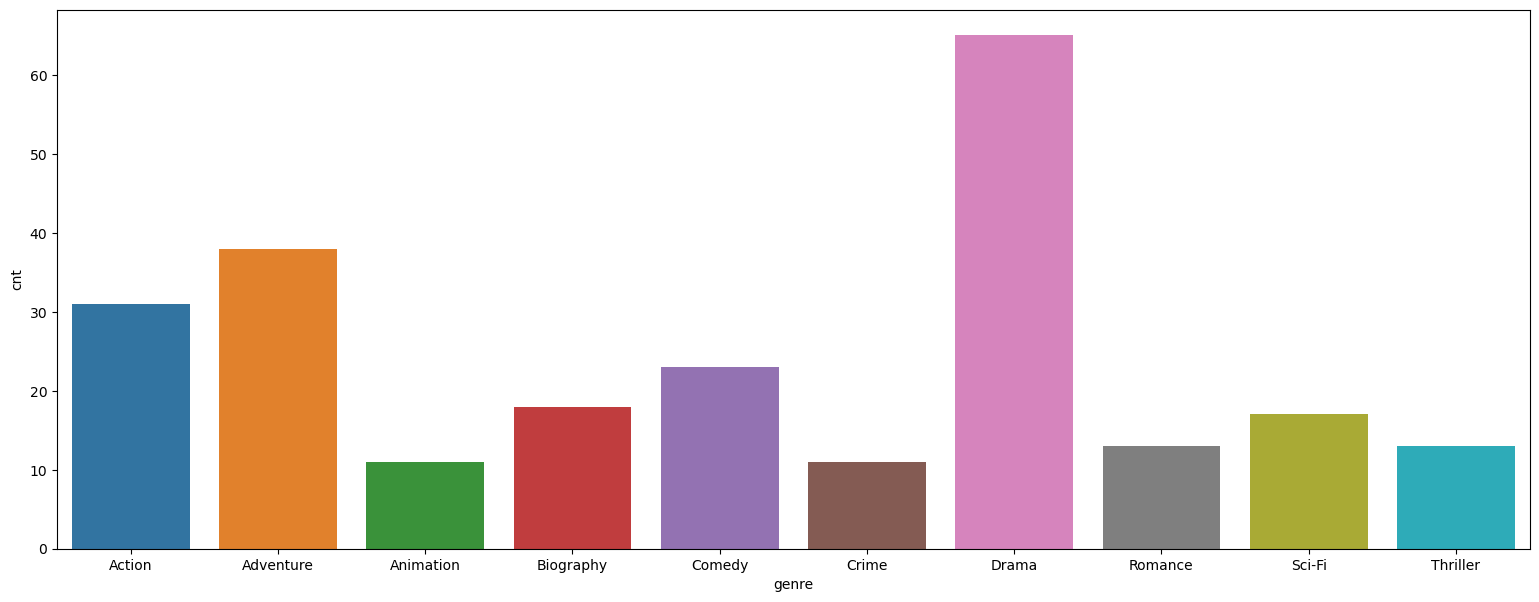

In [53]:
#countplot for genres
plt.figure(figsize = [19,7])
ax = sns.barplot(data = genre_top10, x = 'genre', y = 'cnt')
plt.show()

## Subtask - Gender and Genre

Let's now see how the popularity of genres varies between the two genders in the DataFrame. We will analyze how the average number of votes for males and females is distributed across different genres and age groups.

### Steps:
1. **First Heatmap:** Create a heatmap to visualize how the average number of votes from males varies across genres. The X-axis will contain four age groups for males (`CVotesU18M`, `CVotes1829M`, `CVotes3044M`, and `CVotes45AM`).

2. **Second Heatmap:** Create a heatmap to visualize how the average number of votes from females varies across genres. The X-axis will contain four age groups for females (`CVotesU18F`, `CVotes1829F`, `CVotes3044F`, and `CVotes45AF`).

3. **Comparison:** Plot these heatmaps side by side using subplots to compare the voting behavior of males and females across genres.

4. **Inferences:** Write any 3 inferences based on the comparison of the two heatmaps.


In [54]:
genre_top10.set_index(['genre'], inplace = True)
genre_top10.head()

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
genre,,,,,,,,,,,,,,,,,,,,,
Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,102144,...,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,94596,...,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,61960,...,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0
Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,47333,...,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,60157,...,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0


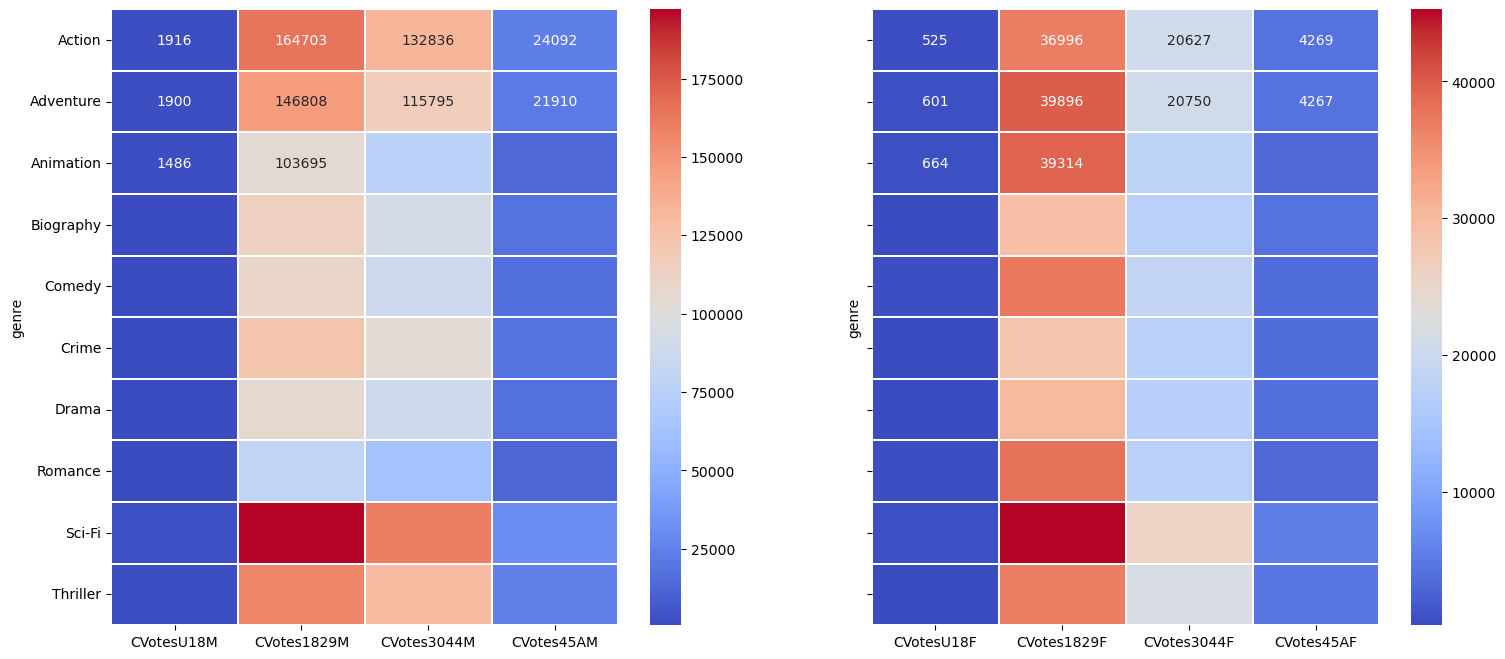

In [55]:
#1st set of heat maps for Cvotes related columns

f,(ax1, ax2) = plt.subplots(1,2, figsize = (18,8), sharey = True)
sns.heatmap(data = genre_top10[['CVotesU18M', "CVotes1829M", 'CVotes3044M', 'CVotes45AM']], cmap = 'coolwarm', annot = True, linewidth = 0.1, ax = ax1, fmt = "d")
sns.heatmap(data = genre_top10[['CVotesU18F', "CVotes1829F", 'CVotes3044F', 'CVotes45AF']], cmap = 'coolwarm', annot = True, linewidth = 0.1, ax = ax2, fmt = "d")
plt.show()

## Inferences

A few inferences that can be drawn from the heatmaps above:

1. **Audience of Age Group 18-29:** The age group 18-29 is the most likely to cast votes, irrespective of gender. This indicates that this demographic is highly engaged with movie voting on IMDb.
  
2. **Least Likely to Vote:** The audience in the age group U18M (under 18 males) is the least likely to cast votes. This suggests that younger male viewers may be less involved in rating or voting on movies.

3. **Genre Popularity:**
   - **Romance:** Romance is the least popular genre among U18M (under 18 males), indicating that younger males may not find this genre appealing.
   - **Crime:** Crime is the least popular genre among U18F (under 18 females), showing a similar trend where younger females may not favor this genre.

Additionally, Sci-Fi appears to be the most popular genre among the 18-29 age group, regardless of gender, highlighting its broad appeal within this demographic.


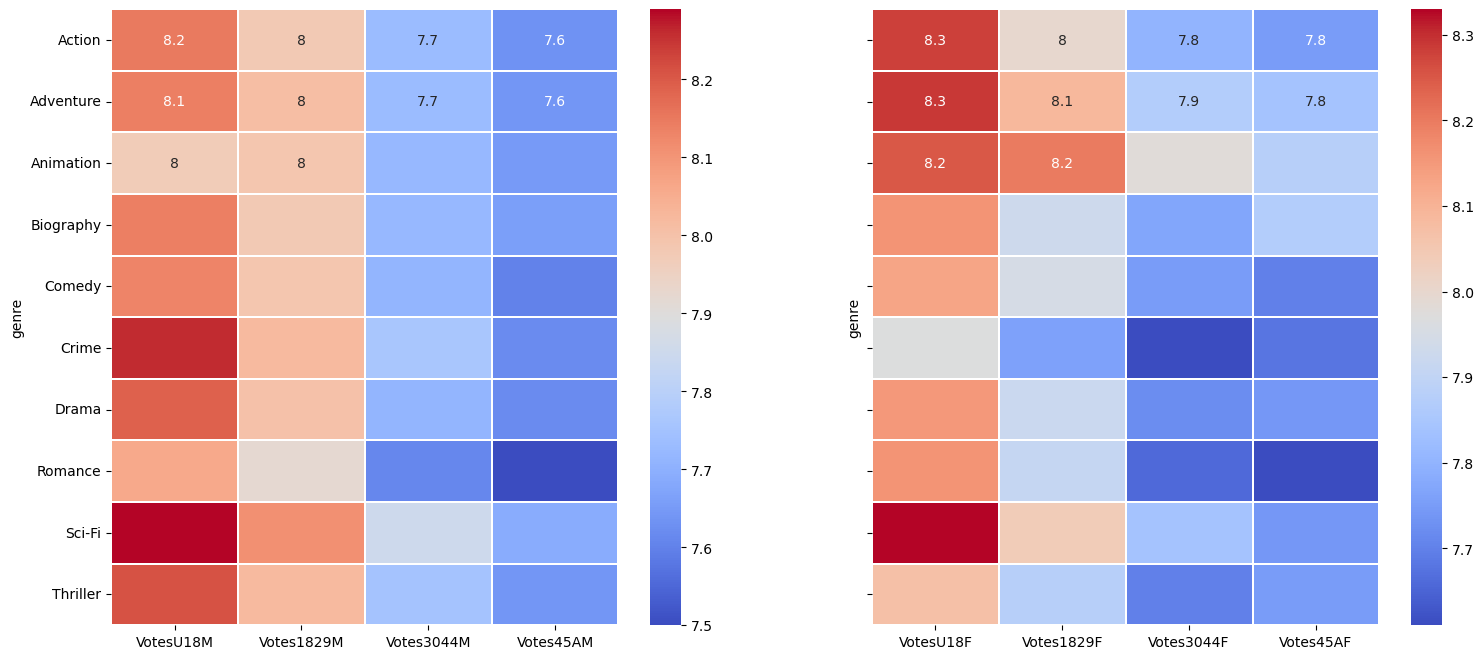

In [56]:
# 2nd heatmap for votes-related columns.
f,(ax1, ax2) = plt.subplots(1,2, figsize = (18,8), sharey = True)
sns.heatmap(data = genre_top10[["VotesU18M", "Votes1829M", "Votes3044M", "Votes45AM"]], cmap = 'coolwarm', annot = True, linewidth = 0.3, ax = ax1)
sns.heatmap(data = genre_top10[['VotesU18F', "Votes1829F", 'Votes3044F', "Votes45AF"]], cmap = 'coolwarm', annot = True, linewidth = 0.3, ax = ax2)
plt.show()

### Inferences from Votes-Related Heatmaps
- Sci-fi appears to be the highest rated genre in the age group of U18 for both males and females, also females in this age group have rated it a bit higher than the males in the same age group.
1. **Inference 1:** The average rating across all genres shows a downward trend as the age group increases. Younger audiences (U18) tend to give higher ratings compared to older age groups.

2. **Inference 2:** The Adventure genre has received the highest ratings from the female audience across all age groups, while the Sci-Fi genre has received the highest ratings from the male audience across age groups. This indicates a gender-based preference in genre ratings.

3. **Inference 3:** The U18 audience is most likely to rate movies higher across genres compared to other age groups. This suggests that younger viewers tend to rate movies more favorably than older viewers.

## US vs Non-US Cross Analysis

The dataset contains both US and non-US movies. Let's analyze how both US and non-US voters responded to US and non-US movies.

In [57]:
#create IFUS column
df['IFUS'] = df.Country.apply(lambda x : 'USA' if x == 'USA' else 'Non-USA')
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,average_ratings,likes,eligible,IFUS
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.1,8.1,8.0,PG-13,Australia,39.738905,4.395,138800.0,False,Non-USA
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.2,8.7,8.8,PG-13,USA,132.568851,4.770,79000.0,True,USA
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.4,8.1,7.9,PG-13,USA,33.914986,4.370,76000.0,True,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.1,7.9,7.8,R,USA,38.695371,4.430,74818.0,False,USA
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.8,8.4,8.4,PG-13,USA,198.130642,4.590,73000.0,True,USA


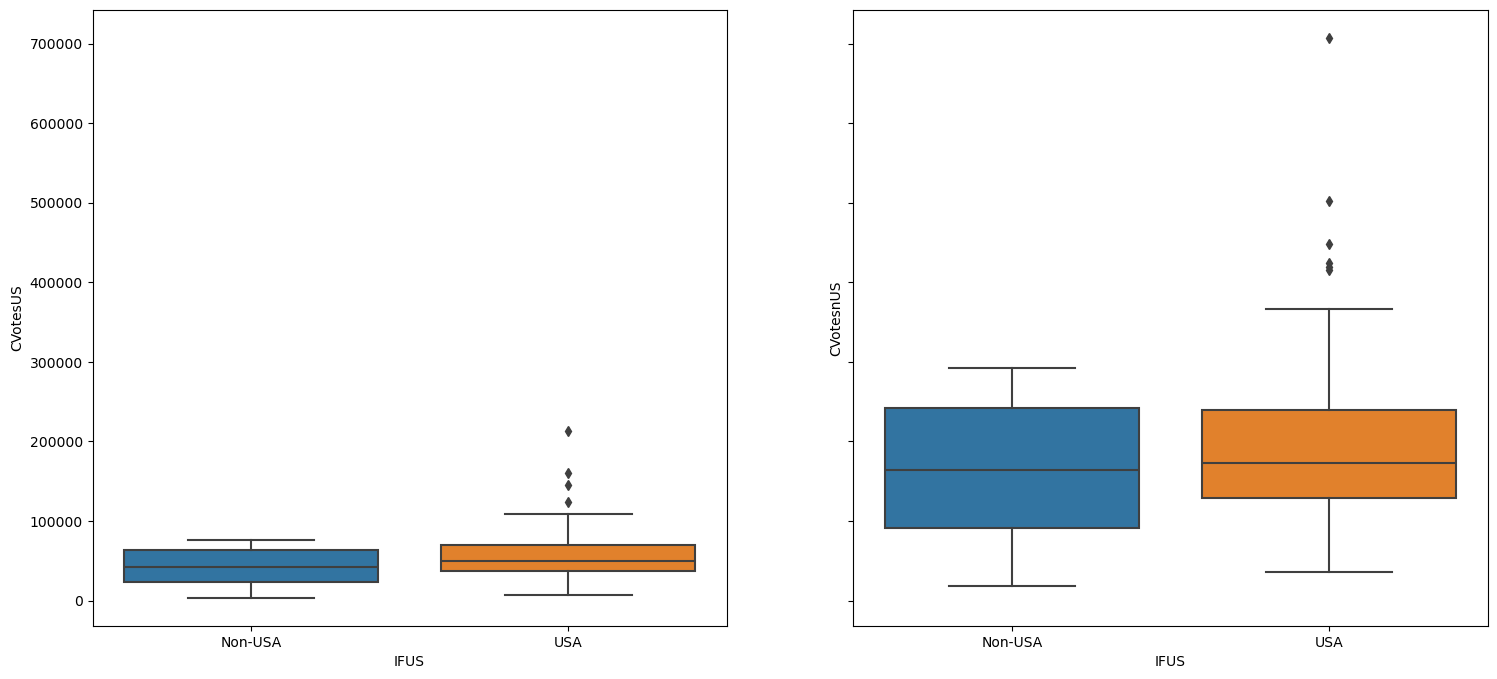

In [58]:
#Box-plot 1- CvotesUS(y) vs IFUS(x)

f, (ax1, ax2) = plt.subplots(1,2, figsize = (18,8), sharey = True)
sns.boxplot(data = df , x = 'IFUS', y = 'CVotesUS', ax = ax1)
sns.boxplot(data = df, x = 'IFUS', y = 'CVotesnUS', ax = ax2)
plt.show()

### Inferences

- **Inference 1:** The total number of votes cast by U.S. people is considerably less than that of non-U.S. people.
  
- **Inference 2:** Both USA and non-USA movies received almost the same average number of votes from both U.S. and non-U.S. people.


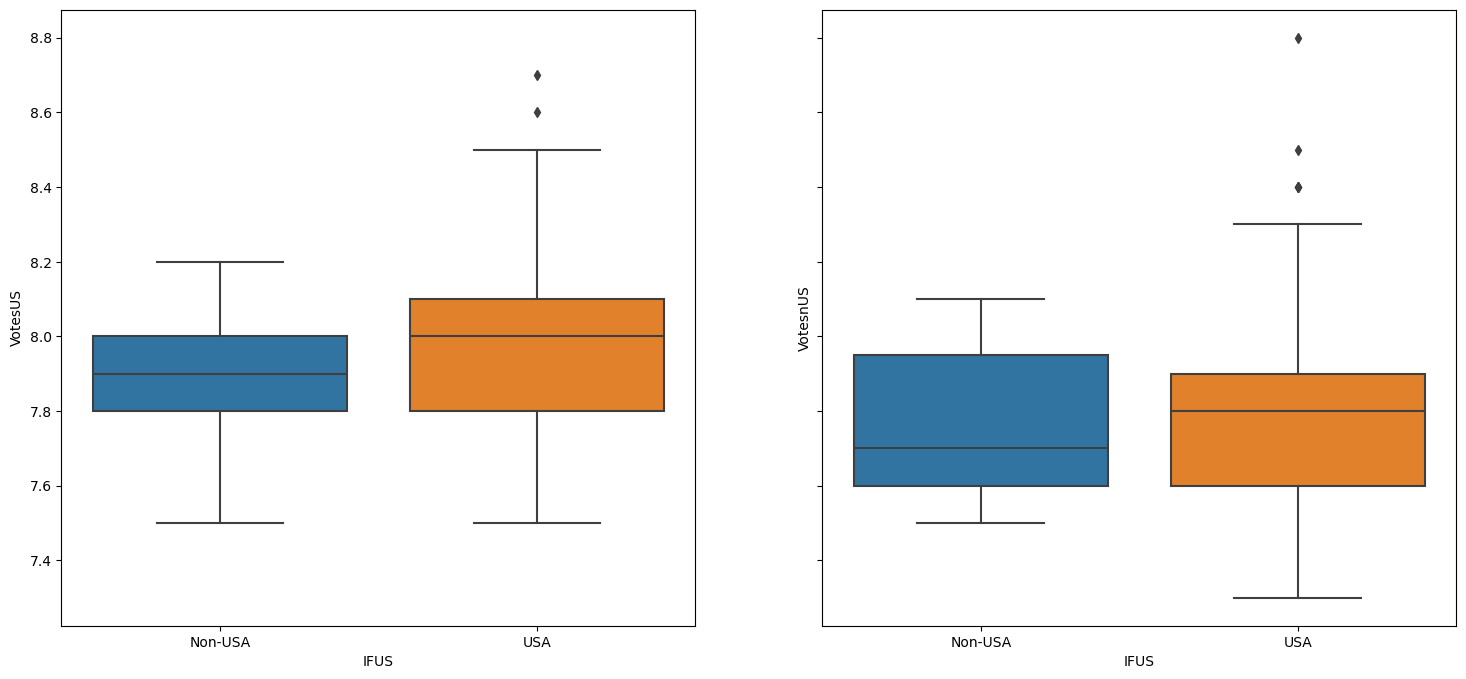

In [59]:
#Boxplot 2- VotesUS vs IFUS(x)
f, (ax1, ax2) = plt.subplots(1,2, figsize = (18,8), sharey = True)
sns.boxplot(data = df, x = 'IFUS', y = "VotesUS", ax = ax1)
sns.boxplot(data = df, x = 'IFUS', y = "VotesnUS", ax = ax2)
plt.show()

### Inferences

1. **Inference 1:** On average, the rating given by U.S. people for USA movies is higher than the rating given by non-U.S. people for USA movies.

2. **Inference 2:** On average, USA movies received higher ratings from non-U.S. people compared to the ratings given by U.S. people.


### Subtask - Top 1000 Voters Vs Genres
- you might have also observed the column CVotes 1000. This column represents the top 1000 voters on IMDB and gives the count for the number of these voters who have voted for a particular movei. lets see how these top 1000 voters have voted across the genres.

1. Sort the dataframe genre_top10 based on the value of CVotes1000 in a descending order
2. Make a seaborn barplot for genre vs CVotes1000.
3. Write your inferences. you can also try to relate it with the heatmaps you did in previous substaks

### Sorting  by CVotes1000

In [60]:
genre_top10 = genre_top10.sort_values(by = 'CVotes1000', ascending = False)
genre_top10


,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
genre,,,,,,,,,,,,,,,,,,,,,
Sci-Fi,6731,2715,3876,6583,14951,39518,106005,176646,148873,136781,...,7.74,7.69,7.96,7.96,8.29,8.33,8.29,8.09,7.88,17.0
Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,102144,...,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
Thriller,4433,1982,2918,5021,11534,32003,90446,153336,112730,83207,...,7.75,7.64,7.82,7.87,8.21,8.07,8.21,7.93,7.81,13.0
Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,94596,...,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
Crime,3383,1544,2246,3842,8971,25308,74671,129045,87919,52229,...,7.68,7.62,7.72,7.87,8.24,7.97,8.26,7.98,7.80,11.0
Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,60157,...,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0
Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,47333,...,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
Drama,3250,1449,2078,3622,8497,23528,66456,109339,75928,52375,...,7.74,7.62,7.85,7.84,8.21,8.15,8.19,7.94,7.78,65.0
Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,61960,...,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0


In [61]:
genre_top10 = genre_top10.reset_index()

In [62]:
genre_top10 = genre_top10.rename(columns = {'index': 'genre'})
genre_top10

,genre,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
0,Sci-Fi,6731,2715,3876,6583,14951,39518,106005,176646,148873,...,7.74,7.69,7.96,7.96,8.29,8.33,8.29,8.09,7.88,17.0
1,Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,...,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
2,Thriller,4433,1982,2918,5021,11534,32003,90446,153336,112730,...,7.75,7.64,7.82,7.87,8.21,8.07,8.21,7.93,7.81,13.0
3,Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,...,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
4,Crime,3383,1544,2246,3842,8971,25308,74671,129045,87919,...,7.68,7.62,7.72,7.87,8.24,7.97,8.26,7.98,7.80,11.0
5,Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,...,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0
6,Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,...,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
7,Drama,3250,1449,2078,3622,8497,23528,66456,109339,75928,...,7.74,7.62,7.85,7.84,8.21,8.15,8.19,7.94,7.78,65.0
8,Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,...,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0
9,Romance,3082,1476,2130,3762,8530,21637,54833,82252,53037,...,7.61,7.50,7.83,7.75,8.14,8.16,8.06,7.83,7.70,13.0


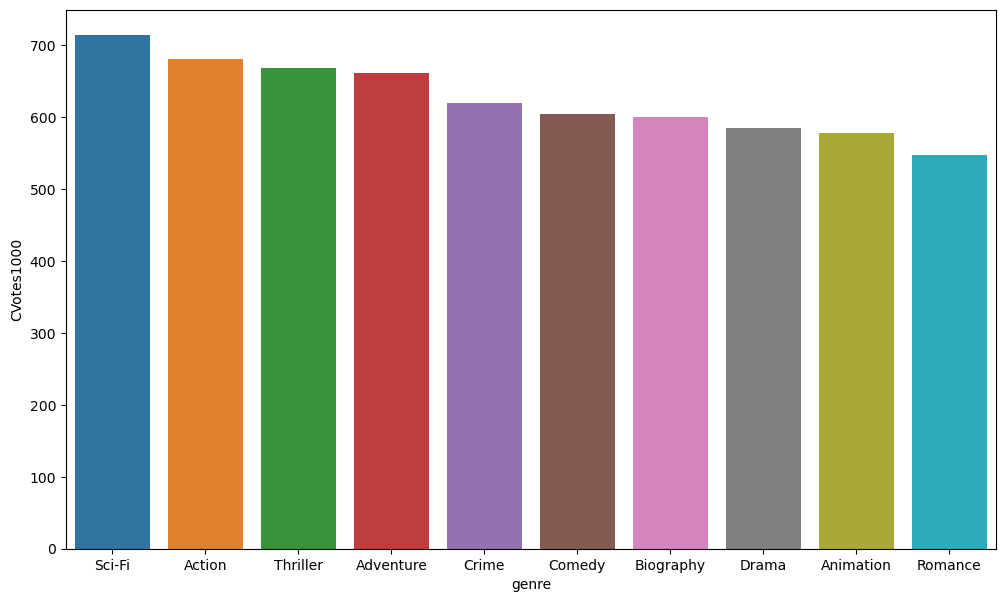

In [63]:
#Bar plot
plt.figure(figsize = [12,7])
ax = sns.barplot(data = genre_top10, x = 'genre', y = 'CVotes1000')
plt.show()

### Inferences on Top 1000 Voters by Genre

- **Sci-Fi is the Most Popular:** The genre "Sci-Fi" has the highest number of votes from the top 1000 voters, indicating that it is the most popular genre among this group.
- **Romance is the Least Popular:** The genre "Romance" has the lowest number of votes from the top 1000 voters, suggesting it is the least favored genre among these influential voters.